<a href="https://colab.research.google.com/github/katherymbr/ML-TP3-parte1/blob/main/TP3_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

APRENDIZAJE DE MÁQUINAS (ML)
---

PRACTICO No. 3. - Parte 1




---


**Encontrar un clasificador por K-NN y evaluar exactitud, precisión, f-measure.s**
---


```
Estudiante: Katherym Bambague Ruíz
```


# **EJERCICIO No. 1**

Supongamos que tenemos un dataset mezcla de dos grupos aleatorios bidimensionales (cada uno con 100 datos, su centroide y covariancia).
Tip: reutilizar el código de la NB que vimos para outliers.
Encontrar un clasificador por K-NN y evaluar exactitud, precisión, f-measure. Tomar inicialmente un dataset de entrenamiento de N=100 (50+50), k=10, y validar con el resto del dataset. Hacer algunos experimentos con otros N y k, y también cambiando centroide y covariancia de las clases.

*Importo las librerias*

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
N_data = 100
mediaA1 = 5
mediaB1 = 2
desvA1 = 2
desvB1 = 2.5

mediaA2 = 6
mediaB2 = 8
desvA2 = 2
desvB2 = 2

X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data)
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
df.head()

,Target,X,Y
86,1,3.445911,-0.515231
162,0,7.526642,6.365461
136,0,2.253867,8.951972
105,0,4.573050,7.141618
127,0,6.190593,9.725987


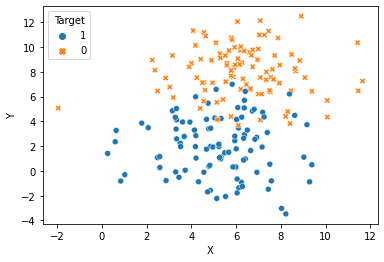

In [3]:
sns.scatterplot(data=df, x="X", y="Y", hue="Target", style="Target")

*Ahora fraccionamos el Dataset en Test en 50/50 y Train*

In [4]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Se entrena el modelo KNN para un valor de 10 vecinos cercanos y se observan los parametros de calidad del modelo

In [5]:
k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predicted =knn.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.94      0.84      0.88        55
           1       0.82      0.93      0.87        45

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.88      0.88       100




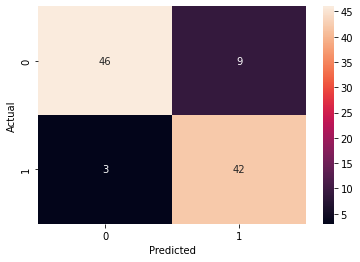

In [6]:
confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Se puede observar como el modelo en general hace una buena clasificación y manteniendo los parametros de calidad del modelo por encima de 0.9

**Variando el tamaño de dataset N = 100, 300, 600, 900. Manteniendo k = 10**

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        53
           1       0.93      0.79      0.85        47

    accuracy                           0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100




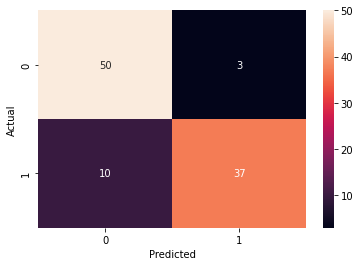

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       145
           1       0.95      0.82      0.88       155

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300




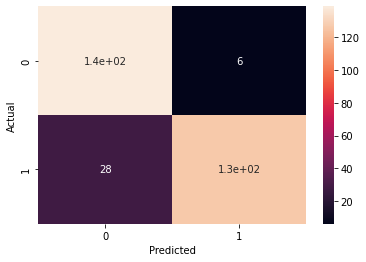

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       293
           1       0.90      0.90      0.90       307

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600




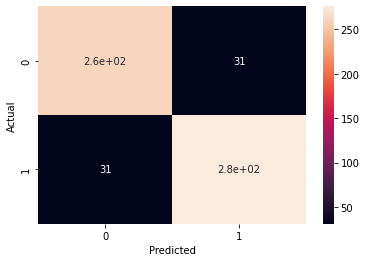

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       465
           1       0.91      0.89      0.90       435

    accuracy                           0.90       900
   macro avg       0.91      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900




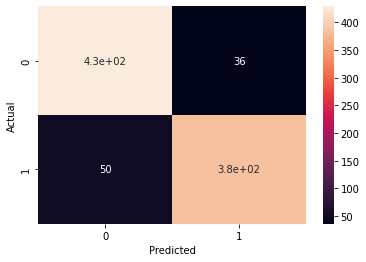

In [7]:
N_data = [100, 300, 600, 900]

for a in N_data:

  X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=a), np.random.normal(loc= mediaB1, scale=desvB1, size=a)
  df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

  X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=a), np.random.normal(loc= mediaB2, scale=desvB2, size=a)
  df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

  df = pd.concat([df1,df2], ignore_index= True, axis=0)
  df = df.sample(n = a*2) 
  X = df.iloc[:,1:3]
  y = df.iloc[:,0]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
  knn.fit(X_train, y_train)
  y_predicted =knn.predict(X_test)
  print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
  confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
  sns.heatmap(confusion_matrix, annot=True)
  plt.show()

Existe alguna variación en los parametros de calidad del modelo a medida que se aumenta el numero de datos, esto debido a la distribución de estos en fucion de la media y la covarianza. Sin embargo el modelo es muy estable y mantiene buenos indices de clasificación. 

**Variando el numero de vecinos k, para N = 100**

valor de k =5
Classification report for classifier KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        55
           1       0.84      0.82      0.83        45

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100




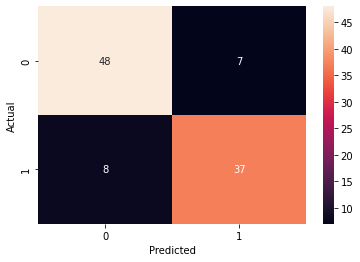

valor de k =10
Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.87      0.95      0.90        55
           1       0.93      0.82      0.87        45

    accuracy                           0.89       100
   macro avg       0.90      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100




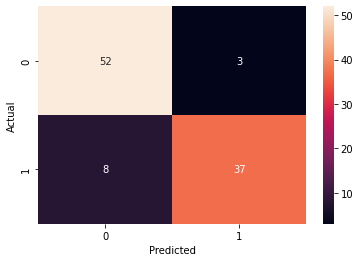

valor de k =20
Classification report for classifier KNeighborsClassifier(n_neighbors=20)
              precision    recall  f1-score   support

           0       0.87      0.95      0.90        55
           1       0.93      0.82      0.87        45

    accuracy                           0.89       100
   macro avg       0.90      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100




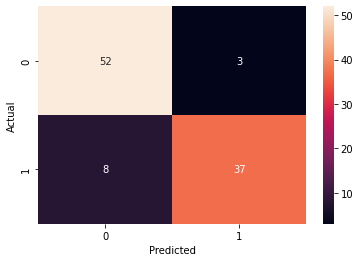

valor de k =40
Classification report for classifier KNeighborsClassifier(n_neighbors=40)
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        55
           1       0.91      0.87      0.89        45

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100




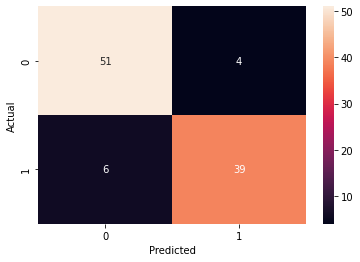

valor de k =80
Classification report for classifier KNeighborsClassifier(n_neighbors=80)
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        55
           1       0.80      0.89      0.84        45

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100




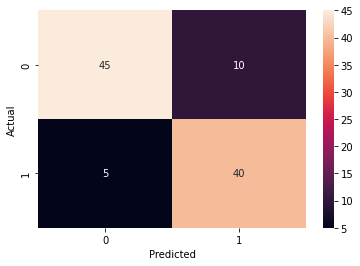

In [8]:

N_data = 100

X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data)
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 

X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

knn = [5, 10, 20, 40, 80]

for k in knn:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_predicted =knn.predict(X_test)
  print('valor de k =' + str(k))
  print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
  confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
  sns.heatmap(confusion_matrix, annot=True)
  plt.show()

Puede observarse un comportamiento inestable en función del numero de vecinos para el cual el modelo hace la clasificación, sin embargo se observa como involucrar un valor muy alto de k puede ser nocivo para el modelo como el en caso de k = 80. Es por esto que el valor de k debe estar alrededor de la raiz de N. Ademas que entre más vecinos a considerar más lento es el modelo.

**Variando los centroides y covarianzas del Dataset, con k = 10**

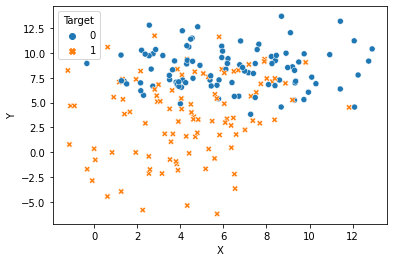

In [9]:
N_data = 100
mediaA1 = 4
mediaB1 = 3
desvA1 = 3
desvB1 = 4

mediaA2 = 6
mediaB2 = 8
desvA2 = 3
desvB2 = 2

X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data)
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
sns.scatterplot(data=df, x="X", y="Y", hue="Target", style="Target")


Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.65      0.93      0.76        43
           1       0.92      0.61      0.74        57

    accuracy                           0.75       100
   macro avg       0.78      0.77      0.75       100
weighted avg       0.80      0.75      0.75       100




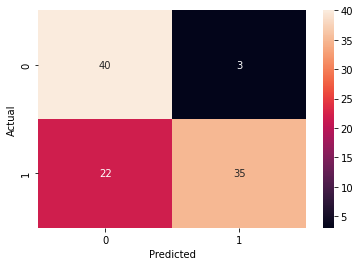

In [10]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predicted =knn.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Puede observarse como al tener un dataset con medias mas cercanas y covarianza mas dispersa, al modelo se le dificulta clasificar estos datos confusos, lo cual es de esperarse puesto que es un clasificador muy simple y por lo general una buena clasificación depende en gran medida de la dispersion de los datos. 

**Probando con un dataset de 3 clases**

In [11]:
N_data = 100
mediaA1 = 4
mediaB1 = 3
mediaC1 = 5
desvA1 = 3
desvB1 = 4
desvC1 = 3

mediaA2 = 6
mediaB2 = 8
mediaC2 = 5
desvA2 = 3
desvB2 = 2
desvC2 = 4

X1, Y1, Z1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data), np.random.normal(loc= mediaC1, scale=desvC1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1, 'Z':Z1})

X2, Y2, Z2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data), np.random.normal(loc= mediaC1, scale=desvC1, size=N_data) 
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2, 'Z':Z2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
df.head()

,Target,X,Y,Z
47,1,3.042869,7.550097,-3.647587
190,0,3.299621,6.464890,0.472113
196,0,6.267556,9.248494,2.728373
9,1,-1.192611,0.223265,4.181390
53,1,5.560442,8.512106,8.293719


Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        49
           1       0.90      0.69      0.78        51

    accuracy                           0.80       100
   macro avg       0.82      0.80      0.80       100
weighted avg       0.82      0.80      0.80       100




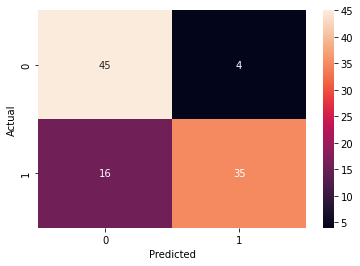

In [12]:
X = df.iloc[:,1:4]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predicted =knn.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

El proceso de entrenamiento no cambia si hay mas varibles, solo hay que involucrar las nuevas features a la hora de entrenar el modelo. En este caso el modelo tiene problemas para predecir el Target 1, habria que verificar si con otros parametros el modelo logra una mejor predicción y un mejor valor de los parametros de calidad.